
![Alt text](https://bimentalist.files.wordpress.com/2018/07/netflix-power-bi-dashboard.png)



Hello! I'm <h3><b>Kiran Hayat </b></h3> a fervent Data Scientist. In our 📊 EDA, we aim to explore various aspects of Netflix content. Our objectives include investigating trends in the number of movies and TV shows added over the years, assessing content diversity by identifying prevalent genres, visualizing geographical distribution to uncover regional preferences, analyzing movie durations for patterns, examining seasonality in releases, and studying content ratings to discern differences between movies and TV shows. Through these objectives, we seek to provide actionable insights for content creators, distributors, and platform administrators. Let's delve into the data and unravel its intricacies!

### <p style="color:#15ef91; font-family:Goudy Stout;  font-size:100%;"><b>Let's Connect</b> </p>


[linkedin](https://www.linkedin.com/in/kiran-hayat-859ab32a0/)\
[github](https://github.com/kiran-hayat)\
[twitter](https://twitter.com/kirandata3387)\
[Gmail](thedatascientistkiran@gmail.com)\
[facebook](https://www.facebook.com/profile.php?id=100081002522441)

#  <b><span style='color:#15ef91 ; font-family:Goudy Stout'>Meta Data</span></b>
**Title:** Netflix Movies and TV Shows Dataset

**Description:** This dataset contains information about movies and TV shows available on Netflix, including details such as title, director, cast, country, date added, release year, rating, duration, listed genres, and description.

**Format:** The dataset is in tabular format, typically stored as a CSV (Comma Separated Values) file.

**Columns:** The dataset contains the following columns:
   1. `type`: Indicates whether the entry is a movie or a TV show.
   2. `title`: Title of the movie or TV show.
   3. `director`: Director(s) of the movie or TV show.
   4. `cast`: Cast of the movie or TV show.
   5. `country`: Country where the movie or TV show was produced.
   6. `date_added`: Date when the movie or TV show was added to Netflix.
   7. `release_yea`r: Year when the movie or TV show was released.
   8. `rating`: Content rating of the movie or TV show.
   9. `duration`: Duration of the movie or TV show.
   10. `listed_in`: Genres or categories the movie or TV show belongs to.
   11. `description`: Brief description of the movie or TV show.
   12. 
**Size:** The dataset contains  number of rows: 8807 and columns: 12.

**Usage:** The dataset can be used for exploratory data analysis, trend analysis, content recommendation systems, and other analytical purposes related to movies and TV shows on Netflix.

### <b><span style='color:#15ef91 ; font-family:Goudy Stout'>load libraries</span></b> 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

### <b><span style='color:#15ef91 ; font-family:Goudy Stout'>load dataset</span></b>

In [2]:
df = pd.read_csv('/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.shape

(8807, 12)

#### <b><span style='color:#15ef91 ; font-family:Goudy Stout'>handle missing values</span></b> 

In [5]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [6]:
# Fill missing values in 'director' , 'cast' , 'country' column with the mode (most frequent value)
df['director'].fillna(df['director'].mode()[0], inplace=True)
df['cast'].fillna(df["cast"].mode()[0], inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df["date_added"].fillna(df['date_added'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df['duration'].fillna(df['duration'].mode()[0],inplace=True)

# <b><span style='color:#15ef91 ; font-family:Goudy Stout'>1. Trend Analysis:</span></b>
## What is the trend in the number of movies and TV shows added to Netflix over the years?

In [7]:
df['date_added'].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [8]:
# Assuming df is your DataFrame and 'date_added' is the column containing the dates in string format
df['date_added'] = df['date_added'].str.strip()  # Remove leading and trailing whitespace
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

# Changing the month name to month number (1 to 12)
df['month'] = df['date_added'].dt.month

# Now 'date_added' column is in datetime format and 'month' column contains the month number


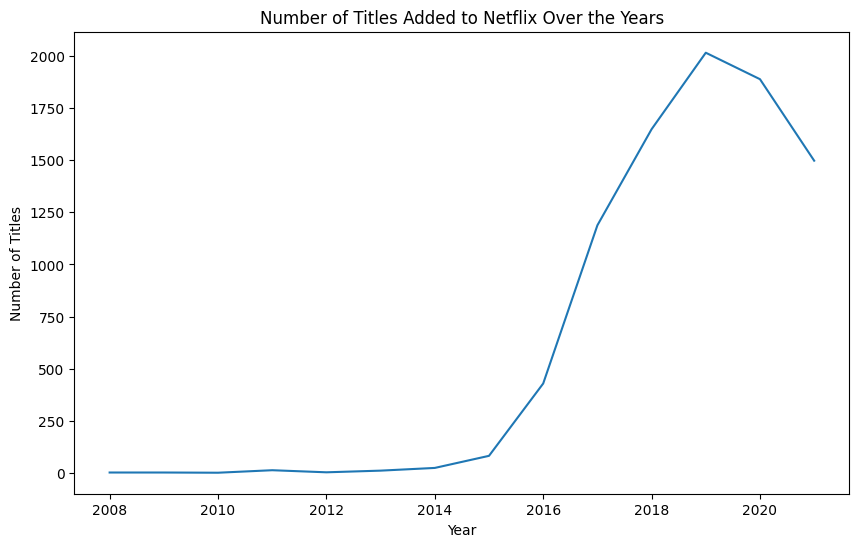

In [9]:
# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Count the number of titles added each year
title_counts = df.groupby('year_added')['title'].count()

# Plot the trend
plt.figure(figsize=(10, 6))
title_counts.plot(kind='line')
plt.title('Number of Titles Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


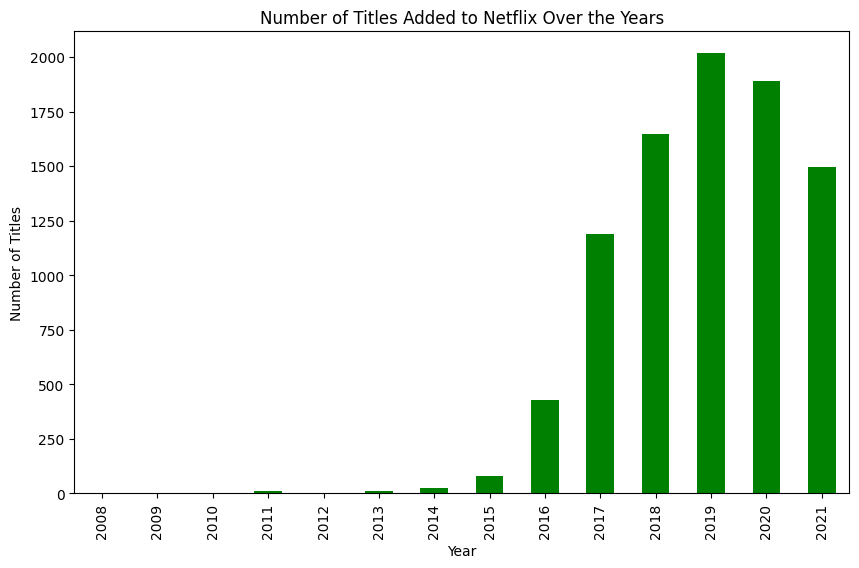

In [10]:
# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Count the number of titles added each year
title_counts = df.groupby('year_added')['title'].count()

# Plot the trend
plt.figure(figsize=(10, 6))
title_counts.plot(kind='bar', color='green')
plt.title('Number of Titles Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


In [11]:
print(title_counts)

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1889
2021    1498
Name: title, dtype: int64


# <b><span style='color:#15ef91 ; font-family:Goudy Stout'>2. Content Diversity:</span></b>
##  How diverse is the content on Netflix in terms of genres? Which genres are the most prevalent?

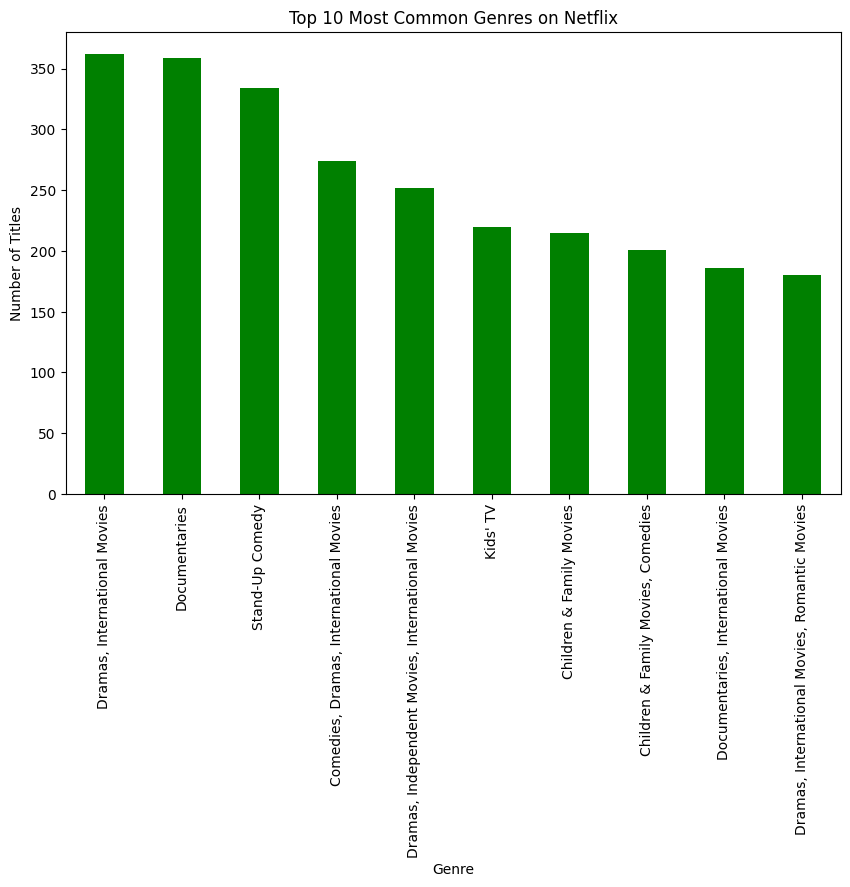

In [12]:
# Count the number of titles in each genre
genre_counts = df['listed_in'].value_counts()

# Plot the top 10 genres
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.show()


In [13]:
print(genre_counts)

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64


# <b><span style='color:#15ef91 ; font-family:Goudy Stout'>3. Geographical Distribution:</span></b> 
Can we visualize the geographical distribution of content availability? Are there any regional preferences in content?

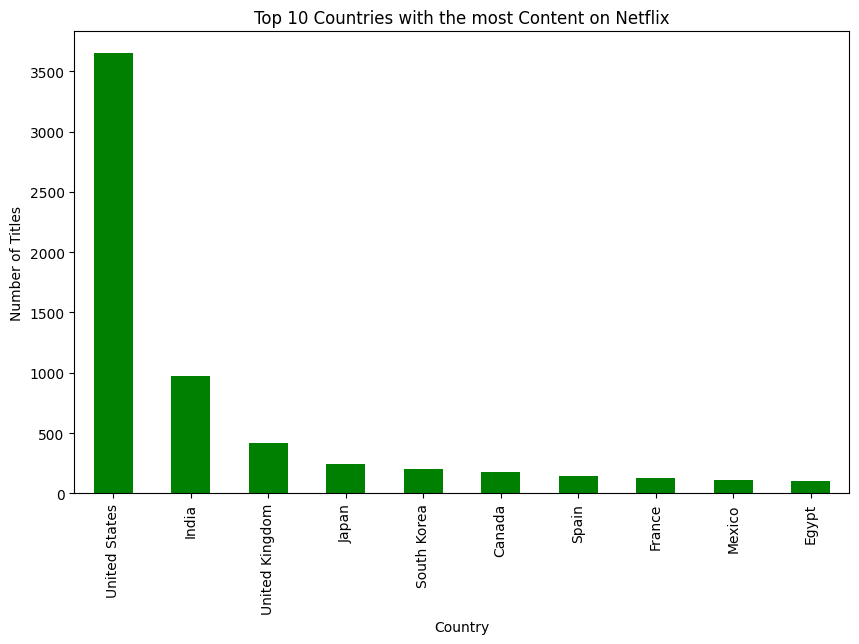

In [14]:
# count the number of titles available in each country
country_counts = df['country'].value_counts()
#plot the top 10 countries with the most content
plt.figure(figsize=(10,6))
country_counts.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Countries with the most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

In [15]:
top_countries=country_counts.head(10)
print('Top 10 countries with most content on Netflix')
for country,count in top_countries.items():
    print(f'Country: {country}, number of Titles: {count}')

Top 10 countries with most content on Netflix
Country: United States, number of Titles: 3649
Country: India, number of Titles: 972
Country: United Kingdom, number of Titles: 419
Country: Japan, number of Titles: 245
Country: South Korea, number of Titles: 199
Country: Canada, number of Titles: 181
Country: Spain, number of Titles: 145
Country: France, number of Titles: 124
Country: Mexico, number of Titles: 110
Country: Egypt, number of Titles: 106


# <b><span style='color:#15ef91 ; font-family:Goudy Stout'>4. Duration Analysis:</span></b> 
What is the distribution of movie durations on Netflix? Are there any patterns or trends?

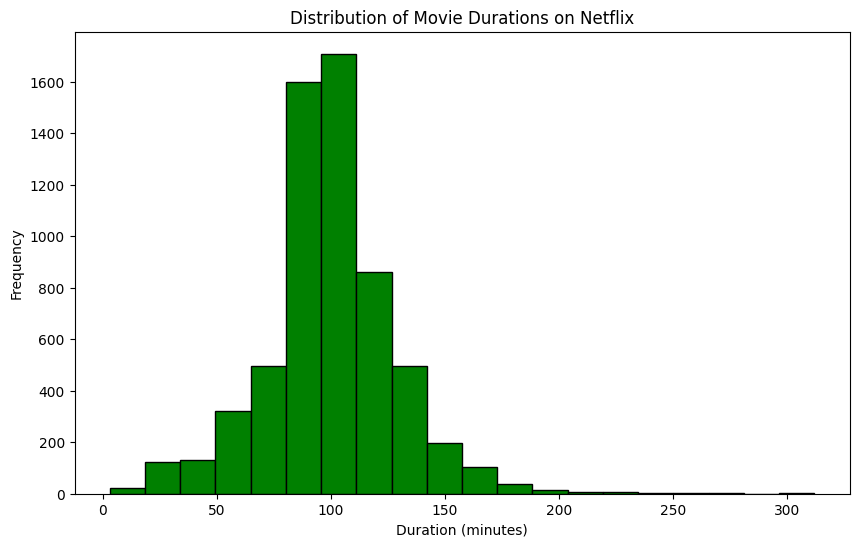

In [16]:
# Filter the DataFrame to include only movies
movies_df = df[df['type'] == 'Movie']
# Drop rows with missing durations
movies_df.dropna(subset=['duration'], inplace=True)
# Extract the duration values and convert them to integers
movie_durations = movies_df['duration'].str.replace(' min', '')
# Convert '1 Season' to NaN and drop rows with missing values
movie_durations = movie_durations.replace('1 Season', np.nan).dropna().astype(int)
# Plot the distribution of movie durations
plt.figure(figsize=(10, 6))
plt.hist(movie_durations, bins=20, edgecolor='black', color='green')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


In [17]:
# tange of Durations:
min_duration=movie_durations.min()
max_duration=movie_durations.max()
print(f'Range of Duration: {min_duration} mintues to { max_duration}  minutes')

Range of Duration: 3 mintues to 312  minutes


In [18]:
# print most common duration:
duration_counts = movie_durations.value_counts().sort_index()
most_common_duration=duration_counts.idxmax()
most_common_count=duration_counts.max()
print(f'Most Common Duration: {most_common_duration} mintues (count: {most_common_count})')

Most Common Duration: 90 mintues (count: 152)


In [19]:
# print variability in Durations
duration_std = movie_durations.std()
print(f'standard deviation of durtions: {duration_std}')

standard deviation of durtions: 28.290593447417397


# <b><span style='color:#15ef91 ; font-family:Goudy Stout'>5. Seasonality:</span></b> 
Is there any seasonality in the release of TV shows or movies on Netflix? For example, are certain genres more likely to be released during specific months?

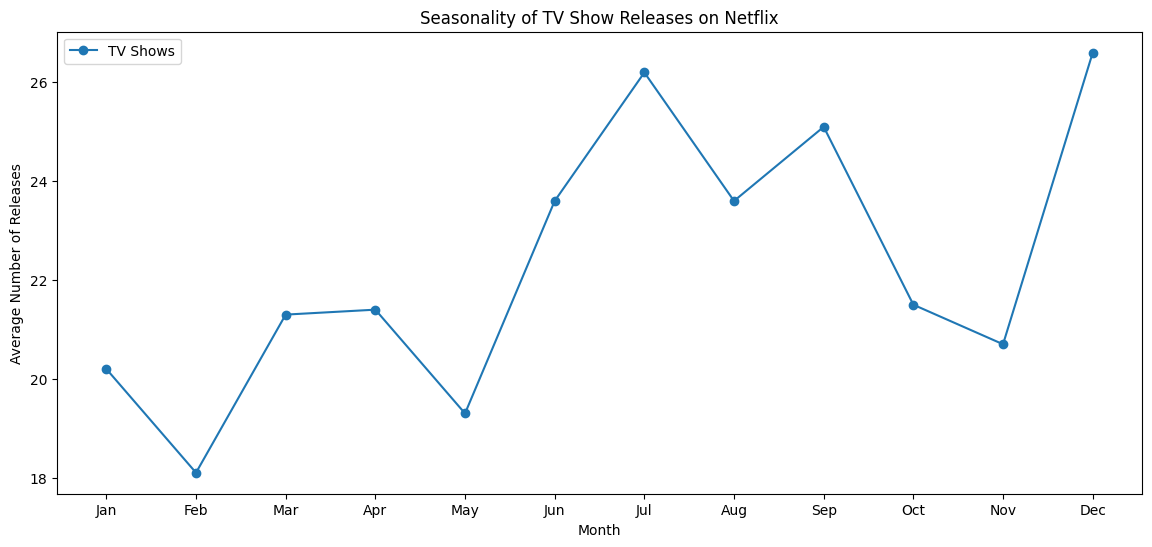

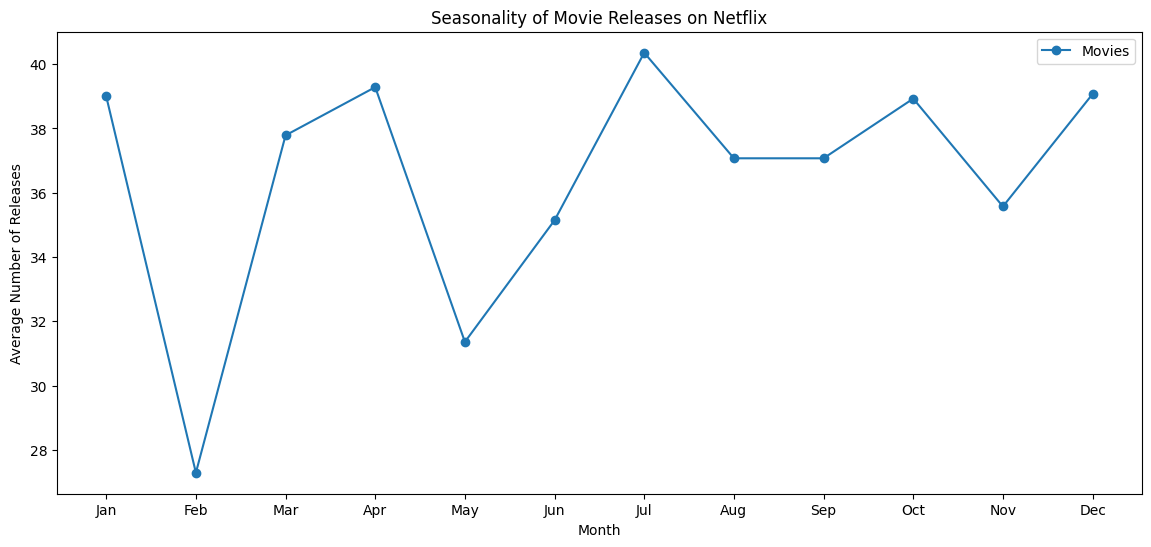

In [20]:
# Extract month and year from the 'date_added' column
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

# Filter the DataFrame to include only TV shows or movies
tv_shows_df = df[df['type'] == 'TV Show']
movies_df = df[df['type'] == 'Movie']

# Group by month and year, count the number of releases, and calculate the total for each genre
tv_shows_monthly_counts = tv_shows_df.groupby(['month_added', 'year_added']).size().unstack(fill_value=0)
movies_monthly_counts = movies_df.groupby(['month_added', 'year_added']).size().unstack(fill_value=0)

# Plotting seasonality for TV shows
plt.figure(figsize=(14, 6))
tv_shows_monthly_counts.mean(axis=1).plot(label='TV Shows', marker='o')
plt.title('Seasonality of TV Show Releases on Netflix')
plt.xlabel('Month')
plt.ylabel('Average Number of Releases')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()

# Plotting seasonality for movies
plt.figure(figsize=(14, 6))
movies_monthly_counts.mean(axis=1).plot(label='Movies', marker='o')
plt.title('Seasonality of Movie Releases on Netflix')
plt.xlabel('Month')
plt.ylabel('Average Number of Releases')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()


In [21]:
# analyszing seasonality of TV show releases
tv_shows_seasonality=tv_shows_monthly_counts.mean(axis=1)
print("seasonality of TV show REleases on Netflix:")
for month , average_releases in tv_shows_seasonality.items():
    print(f"Month :  {month}, Average Number of Releases: {average_releases}")
#analyzing seasonality of movie releases
movies_seasonality=movies_monthly_counts.mean(axis=1)
print("\nSeasonality of Movie Releases on Netflix:")
for month , average_releases in movies_seasonality.items():
    print(f"Month: {month}, Average number of Releases: {average_releases}")

seasonality of TV show REleases on Netflix:
Month :  1, Average Number of Releases: 20.2
Month :  2, Average Number of Releases: 18.1
Month :  3, Average Number of Releases: 21.3
Month :  4, Average Number of Releases: 21.4
Month :  5, Average Number of Releases: 19.3
Month :  6, Average Number of Releases: 23.6
Month :  7, Average Number of Releases: 26.2
Month :  8, Average Number of Releases: 23.6
Month :  9, Average Number of Releases: 25.1
Month :  10, Average Number of Releases: 21.5
Month :  11, Average Number of Releases: 20.7
Month :  12, Average Number of Releases: 26.6

Seasonality of Movie Releases on Netflix:
Month: 1, Average number of Releases: 39.0
Month: 2, Average number of Releases: 27.285714285714285
Month: 3, Average number of Releases: 37.785714285714285
Month: 4, Average number of Releases: 39.285714285714285
Month: 5, Average number of Releases: 31.357142857142858
Month: 6, Average number of Releases: 35.142857142857146
Month: 7, Average number of Releases: 40.3

# <b><span style='color:#15ef91 ; font-family:Goudy Stout'>6. Content Ratings:</span></b>
 What are the most common content ratings (e.g., G, PG, PG-13, R) on Netflix? Is there a difference in the distribution of ratings between movies and TV shows?

In [22]:
# Overall Distribution of Ratings
overall_ratings_distribution = df['rating'].value_counts(normalize=True)

# Ratings distribution for movies and TV shows
movie_ratings_distribution = df[df['type'] == 'Movie']['rating'].value_counts(normalize=True)
tv_show_ratings_distribution = df[df['type'] == 'TV Show']['rating'].value_counts(normalize=True)

# Combine movie and TV show ratings into a single DataFrame
ratings_df = pd.DataFrame({
    'Rating': overall_ratings_distribution.index,
    'Overall': overall_ratings_distribution.values,
    'Movies': movie_ratings_distribution.reindex(overall_ratings_distribution.index).fillna(0).values,
    'TV Shows': tv_show_ratings_distribution.reindex(overall_ratings_distribution.index).fillna(0).values
})

# Melt the DataFrame for easier plotting
ratings_melted = ratings_df.melt(id_vars='Rating', var_name='Type', value_name='Percentage')

# Plotting using Plotly Express
fig = px.bar(ratings_melted, x='Rating', y='Percentage', color='Type', barmode='group',
             labels={'Percentage': 'Percentage of Total', 'Rating': 'Rating'},
             title='Distribution of Content Ratings on Netflix')
fig.show()


In [23]:
#identificaiton of Differences 
print('overall Ratings Distribution:')
print(overall_ratings_distribution)
print('\nmovie ratings distribution:')
print(movie_ratings_distribution)
print('\nTv show ratings distribution:')
print(tv_show_ratings_distribution)

overall Ratings Distribution:
rating
TV-MA       0.364596
TV-14       0.245259
TV-PG       0.097990
R           0.090723
PG-13       0.055638
TV-Y7       0.037924
TV-Y        0.034859
PG          0.032588
TV-G        0.024980
NR          0.009084
G           0.004655
TV-Y7-FV    0.000681
NC-17       0.000341
UR          0.000341
74 min      0.000114
84 min      0.000114
66 min      0.000114
Name: proportion, dtype: float64

movie ratings distribution:
rating
TV-MA       0.336650
TV-14       0.232752
R           0.129995
TV-PG       0.088077
PG-13       0.079922
PG          0.046811
TV-Y7       0.022672
TV-Y        0.021367
TV-G        0.020551
NR          0.012233
G           0.006687
TV-Y7-FV    0.000816
NC-17       0.000489
UR          0.000489
74 min      0.000163
84 min      0.000163
66 min      0.000163
Name: proportion, dtype: float64

Tv show ratings distribution:
rating
TV-MA       0.428625
TV-14       0.273916
TV-PG       0.120703
TV-Y7       0.072870
TV-Y        0.065770
TV-G

# <b><span style='color:#15ef91 ; font-family:Goudy Stout'>output:</span></b>
1. in tranding analysis : hight no of title counts in 2019 and lowest title counts in 2010
2. Most Common Genres on Netflix are Daramas and  International Movies
3. top 10 countries with most content on netflix:
    - United States (3649), India (972), United Kingdom (419), Japan (245), South Korea (199), Canada (181), Spain (145), France (124), Mexico (110), Egypt (106),
4. Duration Analysis: 
    - Range of Duration: 3 mintues to 312  minutes
    - Most Common Duration: 90 mintues (count: 152)
    - standard deviation of durtions: 28.29
5. The analysis highlights seasonal trends in TV show and movie releases on Netflix. TV show releases peak in December (26.6), September (25.1), and July (26.2), while movies see peaks in July (40.36), April (39.29), and December (39.07). Both exhibit increased activity in the summer months. While similar in seasonal patterns, movies generally have higher release numbers. This seasonality offers strategic planning opportunities for Netflix and creators, aligning releases with holidays or events for targeted launches.
6. The analysis of content ratings on Netflix reveals that TV-MA, TV-14, and TV-PG are the most common ratings across both movies and TV shows, collectively representing the majority of available content. TV-MA is particularly prevalent, accounting for a significant portion of both TV shows and movies, followed by TV-14. This suggests a strong presence of mature and adolescent-oriented content on the platform. While other ratings such as R and PG-13 also contribute to the overall distribution, they are less common. The consistency in ratings distribution between movies and TV shows indicates uniformity in rating standards across different types of content on Netflix. These findings offer valuable insights for content creators, distributors, and platform administrators, informing content selection, audience targeting, and platform management strategies.